In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
!pip install konlpy > /dev/null

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
from PIL import Image
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving naverview_ryzen.txt to naverview_ryzen.txt


In [5]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving cpu.png to cpu.png


In [6]:
with open(textfile) as fp:
    text = fp.read()

In [7]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
tokens = okt.nouns(text)
tokens[:10]

['라이', '젠', '세대', '세대', '컴퓨터', '메인보드', '추천', '라이', '젠', '세대']

In [9]:
import re
new_tokens = []
for token in tokens:
    gift = re.sub('[A-Za-z0-9]', '', token)
    if gift:
        new_tokens.append(gift)

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

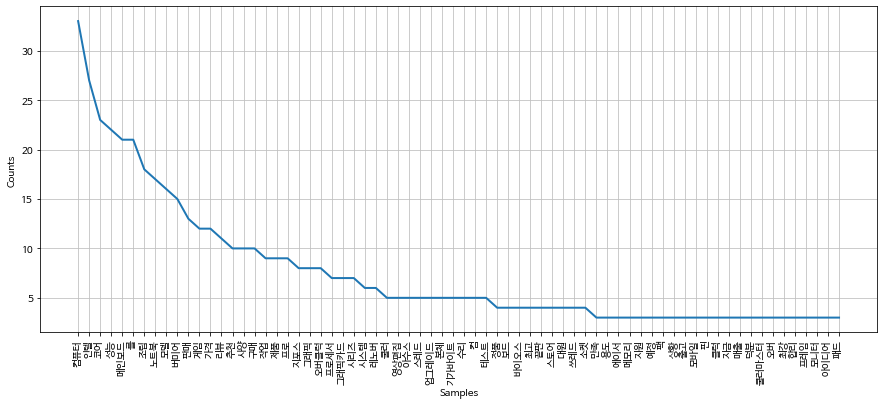

In [19]:
gift = nltk.Text(new_tokens, name = '라이젠')
plt.figure(figsize = (15, 6))
gift.plot(70)
plt.show()

In [18]:
stoptext = '''
젠 라이 사용 클 전 용 게이 밍 세대
의 생각 고객 세잔 수 이번 조합 후기 출시
오늘 탑재 확인질문 요 카페 선택 확인 질문 이 비
견적 최근 내장 기반 로 경우 때 영상 이벤트 대한
정도 포스팅 화이트 사람 것 제 기본 개인 형
글 모두 후 알 가성 가장 이상 구성 요즘
벤큐 답변 기 꼿 위 이제 끗 호기 구합 니 및 바로
꿋 이엠 텍 관련 개 곳 순위 멀티 서브 고 기존 좀
더 장 문의 비디오 하나 시대 다중 자금 늘 한번 방법
램 리 제일 차이 증상 원 카드 파이어 다음 케이스 작성
우리 천안 직접 분 조 익 곳
'''
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['컴퓨터', '메인보드', '추천', '흥행', '작업', '시스템', '시스템', '성능', '극대', '데']

In [14]:
from wordcloud import WordCloud
from PIL import Image

In [21]:
data = gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path = path,
    relative_scaling = 0.2,
    background_color = 'white'
).generate_from_frequencies(dict(data))

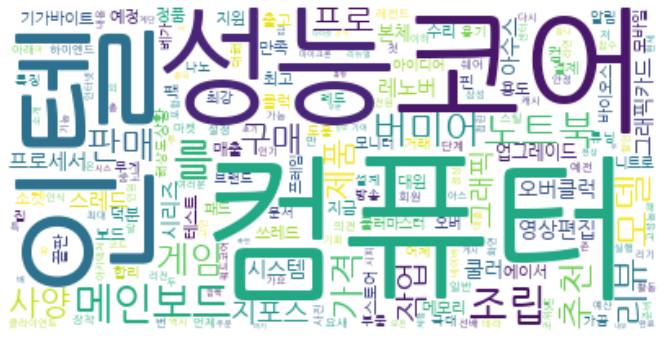

In [22]:
plt.figure(figsize = (12, 6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [23]:
mask = np.array(Image.open(maskfile))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [24]:
wc = WordCloud(
    font_path = path,
    relative_scaling = 0.2,
    background_color = 'white',
    mask = mask,
    min_font_size = 1,
    max_font_size = 120
).generate_from_frequencies(dict(data))

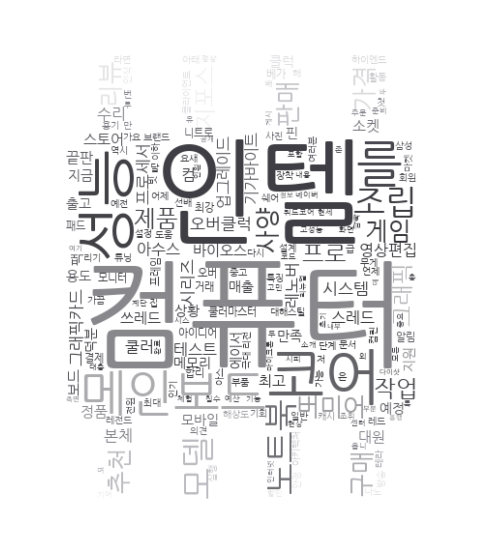

In [25]:
plt.figure(figsize = (10, 10))
plt.imshow(wc.recolor(color_func = image_colors),
           interpolation = 'bilinear')
plt.axis('off')
plt.show()